# Generating chaos on conics #

### basic imports ###

In [1]:
# Core
import numpy as np
import matplotlib.pyplot as plt
import os

# Local imports
from src.utils import *
from src.curves import *
from src.simulation import *
from src.video import *

# For inline videos
from IPython.display import Video


### simple namespace ###

In [34]:
class Args:
    # curve / boundary
    curve_type = "parabola"
    P = 2000
    d = 2.0
    seed = 0

    # particles
    x0 = 1.0
    y0 = 1.5
    N = 50
    del_x = 1e-3
    vx0 = 0.0
    vy0 = 0.0

    # physics
    g = 98.1
    del_t = 1e-3
    T = 5_000

    # video
    fps = 60
    dpi = 120
    cmap = "viridis"
    background = "white"
    output_path = "outputs/"


args = Args()

print(args.curve_type)

parabola


### the wall ###

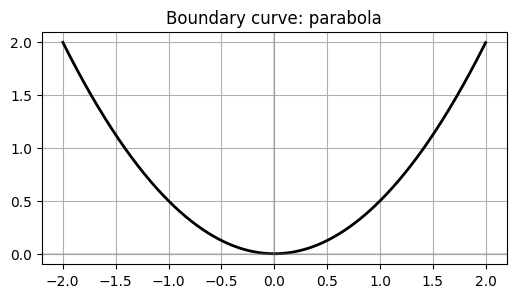

In [35]:
# Select curve
curve_fn = CURVE_REGISTER[args.curve_type]

# Sample x-values for boundary
x_curve = generate_boundary_points(args.P, args.d, args.seed)

# Compute boundary
bx, by, dydx = curve_fn(x_curve)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(bx, by, color="black", linewidth=2)
plt.axhline(0, color="gray", alpha=0.3)
plt.axvline(0, color="gray", alpha=0.3)
plt.grid(True)
plt.gca().set_aspect("equal", adjustable="box")
plt.title(f"Boundary curve: {args.curve_type}")
plt.show()


### scatter plot of time evolution ###

In [36]:
# Initial particle positions
x_init = args.x0 + np.arange(args.N) * args.del_x
y_init = np.full(args.N, args.y0)

positions = simulate(
    x_init=x_init,
    y_init=y_init,
    vx0=args.vx0,
    vy0=args.vy0,
    curve_fn=curve_fn,
    curve_params={},   # defaults only for now
    del_t=args.del_t,
    g=args.g,
    T=args.T,
)

print(positions.shape)

(50, 5000, 2)


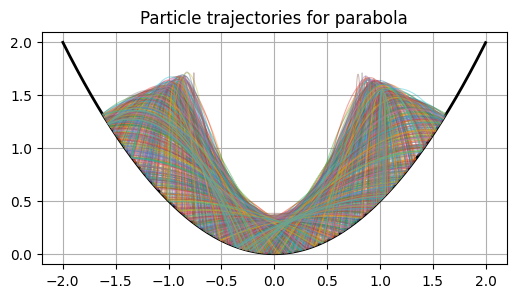

In [37]:
plt.figure(figsize=(6, 6))

# Plot boundary
plt.plot(bx, by, color="black", linewidth=2)

# Plot trajectories (thin)
for i in range(args.N):
    plt.plot(
        positions[i, :, 0],
        positions[i, :, 1],
        alpha=0.4,
        linewidth=0.8,
    )


plt.gca().set_aspect("equal", adjustable="box")
plt.grid(True)
plt.title(f"Particle trajectories for {args.curve_type}")

os.makedirs('./plots', exist_ok=True)
fn = f'./plots/{args.curve_type}.png'
plt.savefig(fn, format='png', bbox_inches='tight')

plt.show()


### generate video ###

In [7]:
# optional debugs # 

import matplotlib.animation as animation
print(animation.writers.list())

# check ffmpeg available or not (recommended) # 

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [8]:
os.makedirs(args.output_path, exist_ok=True)
args.file_name = os.path.join(args.output_path, f"{args.curve_type}.mp4")

make_video(
    positions=positions,
    boundary_xy=(bx, by),
    fps=args.fps,
    dpi=args.dpi,
    cmap=args.cmap,
    background=args.background,
    output_path=args.file_name,
)

# Takes 9.6s for 500 points #
# Takes 94.5s for 5000 points #
